In [196]:
# script to plot TTS for all UT segments 
# date created: 3/3/2020
# author: sofia chelpon
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
############ --------------- PREP WORKSPACE --------------- ###########
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [2]:
############ --------------- LOAD SEGMENT DATA --------------- ###########
utbl_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/utbl_allseg_campavgbl_bltau_twp.pkl')
mustar_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/mustar_allseg_campavgbl_bltau_twp.pkl')
tau_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/tau_allseg_campavgbl_bltau_twp.pkl')
t_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/t_allseg_campavgbl_bltau_twp.pkl')
gf_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/gf_allseg_campavgbl_bltau_twp.pkl')
seg_info = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/segment_info_campavgbl_bltau_twp.pkl')
trcnames_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/trcnames_allseg_twp_bltau.pkl")

In [3]:
############ --------------- FILTER BY R^2 VALUES --------------- ###########
high_r2_idx = np.ndarray.flatten(np.argwhere(seg_info['r squared'].values >= 0.65))

seg_info_screened = seg_info.iloc[high_r2_idx]

# screen vars 
mustar_allseg_screened = mustar_allseg[high_r2_idx]
utbl_allseg_screened = utbl_allseg[high_r2_idx]
tau_allseg_screened = tau_allseg[high_r2_idx]
trcnames_allseg_screened = trcnames_allseg[high_r2_idx]

gf_allseg_screened = gf_allseg[high_r2_idx]
t_allseg_screened = t_allseg[high_r2_idx]

In [4]:
############ --------------- GET SEGMENT AVERAGE --------------- ###########

In [5]:
### GET INDEX FOR EACH TRACER IN COLUMN (NOT SAME FOR EVERY COLUMN)
# tracer names, full list 
names = trcnames_allseg[8].values

fill = np.empty(len(seg_info_screened))
fill[:] = np.nan

# thing to fill with index of each tracer in every column 
trc_idx = pd.DataFrame()
for nn in names:
    trc_idx[nn] = pd.Series(fill)
    
# loop through, get index location for every tracer 
col = list(trcnames_allseg_screened)
for nn in names:
    nnidx = []
    for i in col:
        idx = np.argwhere(trcnames_allseg_screened[i].values == nn)
        if (len(idx) > 0):
            nnidx.append(np.ndarray.item(idx))
        else: 
            nnidx.append(np.nan)
    trc_idx[nn] = nnidx 

In [6]:
### SIMPLE ONES 
# tau, use full list 
avg_tau = np.empty(52)
avg_tau[:] = np.nan
avg_tau = tau_allseg[8]

# get r2, tau 
avg_r2 = seg_info_screened['r squared'].mean()

In [7]:
### FIT, FIG A 
avg_utbl = np.empty(52)
avg_utbl[:] = np.nan

avg_mustar = np.empty(52)
avg_mustar[:] = np.nan

col = list(utbl_allseg_screened)

# loop through every tracer, get average 
for ii, nn in enumerate(names):
    indnan = trc_idx[nn].values 
    trc_utbl = []
    trc_mustar = []
    for i, idx in enumerate(col):
        tt = indnan[i]
        if (np.isfinite(tt) == True):
            trc_utbl.append(utbl_allseg_screened[idx].loc[int(tt)])
            trc_mustar.append(mustar_allseg_screened[idx].loc[int(tt)])
    avg_utbl[ii] = np.mean(trc_utbl)
    avg_mustar[ii] = np.mean(trc_mustar)

In [8]:
### GREENS FUNC, FIG B 
avg_gf = gf_allseg_screened.mean(axis = 1)
avg_t = t_allseg_screened.mean(axis = 1)

In [9]:
avg_mode_age = seg_info_screened['mode age'].mean()
avg_mean_age = seg_info_screened['mean age'].mean()

In [10]:
####################################################################################
####################################################################################
# choose rf05 segment 
ascend_mode = seg_info_screened.sort_values('mode age')
short10 = ascend_mode[:10]
short = short10.iloc[0]
short_idx = short.name
short_idx

37

In [11]:
############ --------------- FIND MAX CURVES --------------- ###########
max_mode_loc = np.argmax(seg_info_screened['mode age']) 
max_mean_age = np.max(seg_info_screened['mean age']) 
max_mode_age = np.max(seg_info_screened['mode age']) 

max_utbl = utbl_allseg_screened[max_mode_loc].values
max_r2 = seg_info_screened['r squared'].loc[max_mode_loc]
max_mustar = mustar_allseg_screened[max_mode_loc].values
max_tau = tau_allseg_screened[max_mode_loc].values
max_gf = gf_allseg_screened[max_mode_loc].values
max_t = t_allseg_screened[max_mode_loc].values


In [12]:
############ --------------- FIND MIN CURVES --------------- ###########
#min_mode_loc = np.argmin(seg_info_screened['mode age']) 
min_mode_loc = short_idx

min_mean_age = np.min(seg_info_screened['mean age']) 
print(min_mean_age, max_mean_age)

min_mode_age = np.min(seg_info_screened['mode age']) 
print(min_mode_age, max_mode_age)

# utbl  
min_utbl = utbl_allseg_screened[min_mode_loc].values
min_r2 = seg_info_screened['r squared'].loc[min_mode_loc]
min_mustar = mustar_allseg_screened[min_mode_loc].values
min_tau = tau_allseg_screened[min_mode_loc].values
min_gf = gf_allseg_screened[min_mode_loc].values
min_t = t_allseg_screened[min_mode_loc].values

1.9313806416355075 20.527447089250906
0.5390630472175808 5.5390630472175815


In [13]:
# which ones are enhanced?
trcnames = trcnames_allseg[min_mode_loc]
trcnames['ratios'] = min_utbl
trcnames['lifetime'] = min_tau

In [14]:
###########################################################################################
###########################################################################################
###########################################################################################
# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

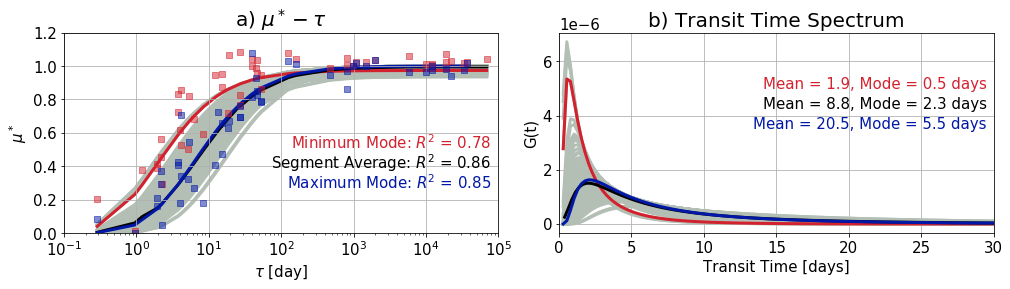

In [15]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 
add_meanmode = 1 
add_scatter = 1
add_r2 = 1 

# colors
myred = [0.83, 0.13, 0.18] 
myblue = [0, 0.09, 0.66]

# minimum 
overplot = 1
add_meanmode = 1 
add_scatter = 1
add_r2 = 1 
title_str = 'Minimum Mode: '
my_color = myred
tts_mod.plot_tts(min_tau, min_mustar, min_utbl, min_r2, 
                        min_gf, min_t, min_mean_age, min_mode_age, 
                        my_color, overplot, add_scatter, add_r2, add_meanmode, 
                        my_ax, width, height, title_str)

# SEGMENT average, not campaign average
overplot = 2
add_meanmode = 1 
add_scatter = 0
add_r2 = 1 
title_str = 'Segment Average: '
my_color = 'k'
tts_mod.plot_tts(avg_tau, avg_mustar, avg_utbl, avg_r2, 
                        avg_gf, avg_t, avg_mean_age, avg_mode_age, 
                        my_color, overplot, add_scatter, add_r2, add_meanmode, 
                        my_ax, width, height, title_str)
# maximum 
overplot = 3
add_meanmode = 1 
add_scatter = 1
add_r2 = 1 
title_str = 'Maximum Mode: '
my_color = myblue
tts_mod.plot_tts(max_tau, max_mustar, max_utbl, max_r2, 
                        max_gf, min_t, max_mean_age, max_mode_age, 
                        my_color, overplot, add_scatter, add_r2, add_meanmode, 
                        my_ax, width, height, title_str)

# add grid
ax0, ax1 = my_ax
ax0.grid(which = 'major')
ax1.grid(which = 'major')
ax0.set_ylim([0, 1.2])

# --------------- save figure 
svpath = '/Volumes/scdrive2/TTS_2020/get_tts/figures/'
fig.savefig(svpath + 'tts_vary_ut_bltau_campavgbl_twp.pdf')  


In [16]:
###########################################################################################
###########################################################################################
###########################################################################################

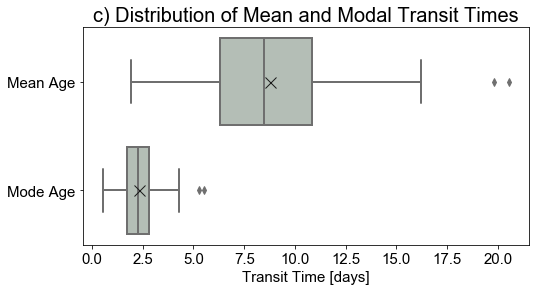

In [17]:
############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
seg_info_clip = pd.DataFrame()
seg_info_clip['Mean Age'] = seg_info_screened['mean age'].values
seg_info_clip['Mode Age'] = seg_info_screened['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = seg_info_clip, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)

# --------------- save figure 
svpath = '/Volumes/scdrive2/TTS_2020/get_tts/figures/'
fig.savefig(svpath + 'boxplot_vary_ut_bltau_campavgbl_twp.pdf')  